In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn 디폴트 색상, 스타일 등 설정

In [450]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [451]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [452]:
train.shape

(891, 12)

In [453]:
train.describe(include=['O']) # Object 타입에 대한 기술통계.
# unique: 유일한 것들(종류의 갯수인가??)
# freq: 가장 빈번했던 것들

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pears, Mr. Thomas Clinton",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [454]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [455]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [456]:
test.shape

(418, 11)

In [457]:
# 훈련: 891 / 테스트: 418 = 1309건 
# 보통 훈련: 70% / 테스트: 30%

In [458]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [459]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [460]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [461]:
# Feature들과 생존 사이에 어떤 관계가 있는가?

In [462]:
survived['Survived'].sum()

342

In [463]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]
# Survived: 300(40%) 이런 식으로 출력
print('Survived: %d (%.1f%%)' % (len(survived), len(survived)/len(train)*100.0))
print('not_Survived: %d (%.1f%%)' % (len(not_survived), len(not_survived)/len(train)*100.0))
print('Total: %d' % len(train))



Survived: 342 (38.4%)
not_Survived: 549 (61.6%)
Total: 891


In [464]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [465]:
# Q2. 등실 별 생존 여부에 따른 인원수 출력
train.groupby(['Pclass','Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [466]:
train.groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [467]:
train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


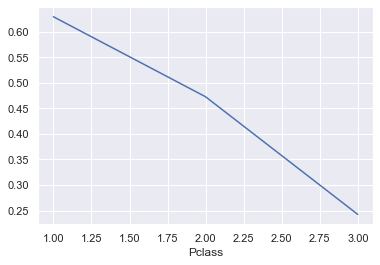

In [468]:
train.groupby("Pclass").Survived.mean().plot()

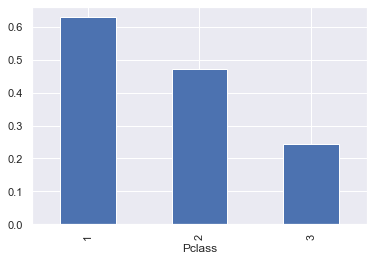

In [469]:
train.groupby("Pclass").Survived.mean().plot(kind='bar')

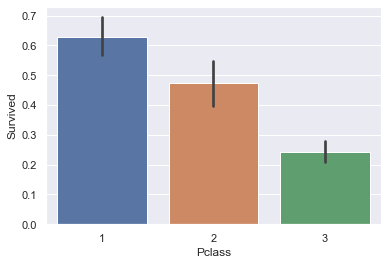

In [470]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [471]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [472]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


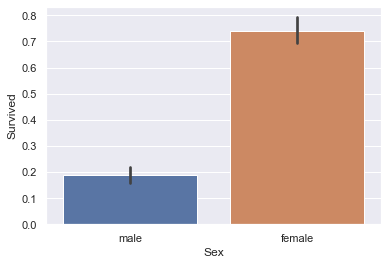

In [473]:
sns.barplot(x='Sex',y='Survived',data=train)

In [474]:
# Pclass & Sex의 열을 동시에 고려하겠다.
# Cross Table(교차행렬)
pd.crosstab(train['Pclass'],train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


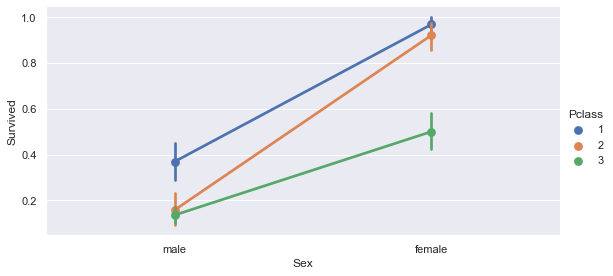

In [475]:
sns.factorplot('Sex','Survived',hue='Pclass',data=train, aspect = 2, size = 4)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


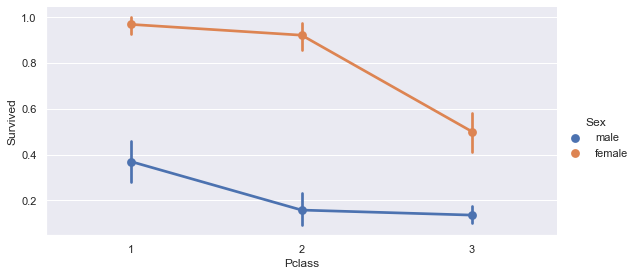

In [476]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train, aspect = 2, height = 4)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


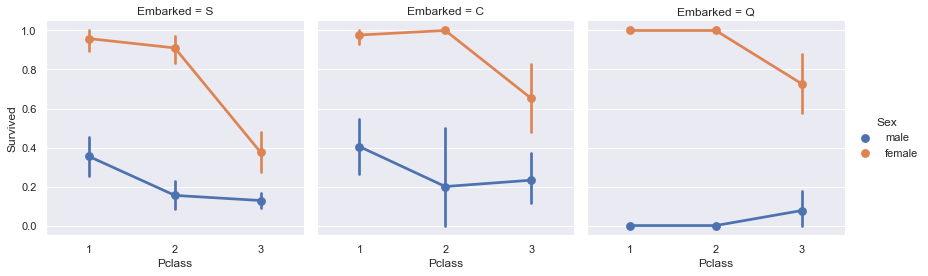

In [477]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train, aspect = 1, height = 4, col = 'Embarked')

In [478]:
# Pclass 1과 2의 여성은 대부분 살아남았다.(생존률 매우 높다)
# Pclass 1에 비해 2의 생존률이 약간 높다.
# 

In [479]:
# 승선 항구에 따른 생존 여부?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [480]:
train.groupby(['Embarked','Pclass']).Survived.value_counts()

Embarked  Pclass  Survived
C         1       1            59
                  0            26
          2       1             9
                  0             8
          3       0            41
                  1            25
Q         1       0             1
                  1             1
          2       1             2
                  0             1
          3       0            45
                  1            27
S         1       1            74
                  0            53
          2       0            88
                  1            76
          3       0           286
                  1            67
Name: Survived, dtype: int64

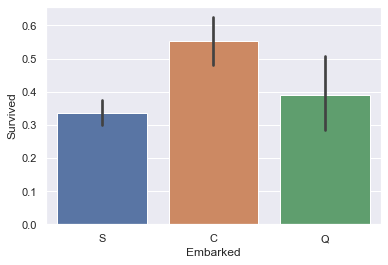

In [481]:
sns.barplot(x='Embarked',y='Survived',data=train)

In [482]:
# parch와 생존여부의 관계
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [483]:
train.groupby("Parch").Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [484]:
train[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


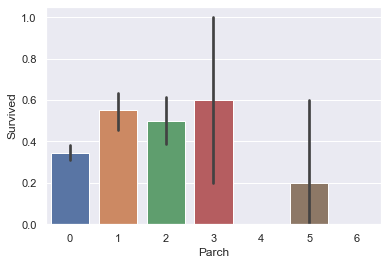

In [485]:
sns.barplot(x='Parch',y='Survived',data=train)
# 세로 선: Error Bar(오차막대) → 신뢰구간 95%

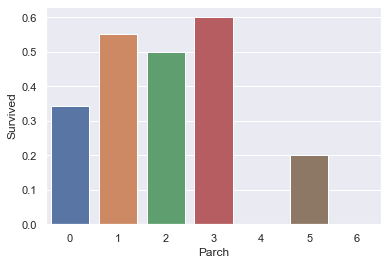

In [486]:
sns.barplot(x='Parch',y='Survived',data=train, ci=None)

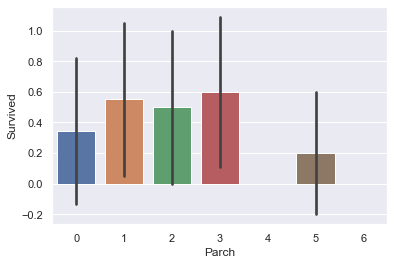

In [487]:
# ci → 표준편차!
sns.barplot(x='Parch',y='Survived',data=train,ci='sd')

In [488]:
# SibSp와 생존 여부의 관계
# Sibling? 형제, 사촌, 반계
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [489]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [490]:
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


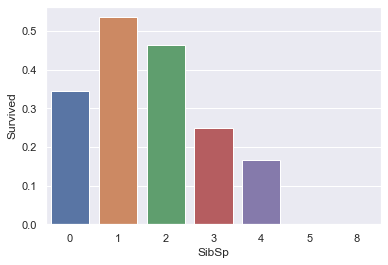

In [491]:
sns.barplot(x='SibSp',y='Survived',data=train,ci=None)

In [492]:
# 연령별, 항구/Pclass/성별 , 생존여부(범례) → 바이올린 plot

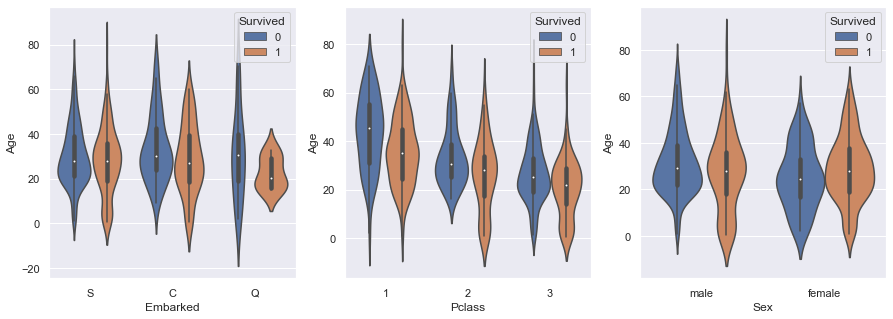

In [493]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(131) # 1줄을 세칸으로 나눈 첫번째칸
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.violinplot(x='Embarked',y='Age',hue='Survived',data=train,ax=ax1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train,ax=ax2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train,ax=ax3)
# 흰색점: 중앙값(median)
# 중앙의 두꺼운 선: 사분위 범위
# 중앙의 얇은선: 신뢰구간(95% 신뢰구간)

In [494]:
# 1등석 나이가 많다

In [495]:
total_survived = train[train['Survived'] ==1]
total_not_survived = train[train['Survived'] ==0]

In [496]:
Male_survived = train[(train['Survived'] ==1)&(train['Sex']=='male')]
Female_survived = train[(train['Survived'] ==1)&(train['Sex']=='female')]
Male_not_survived = train[(train['Survived'] ==0)&(train['Sex']=='male')]
Female_not_survived = train[(train['Survived'] ==0)&(train['Sex']=='female')]

In [497]:
# distplot: 히스토그램, 수치형 데이터의 빈도수를 시각화

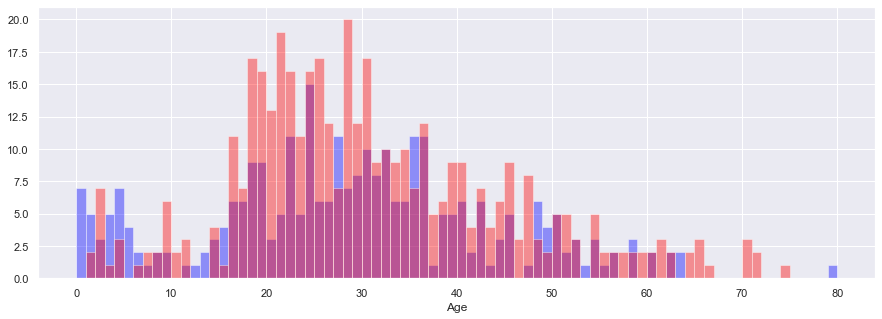

In [498]:
# 연령에 따른 빈도 수
plt.figure(figsize = (15,5),)
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='blue')
sns.distplot(total_not_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='red',axlabel='Age')
# kde = True 디폴드 / ked = 밀집도
#sns.set_style('darkgrid')

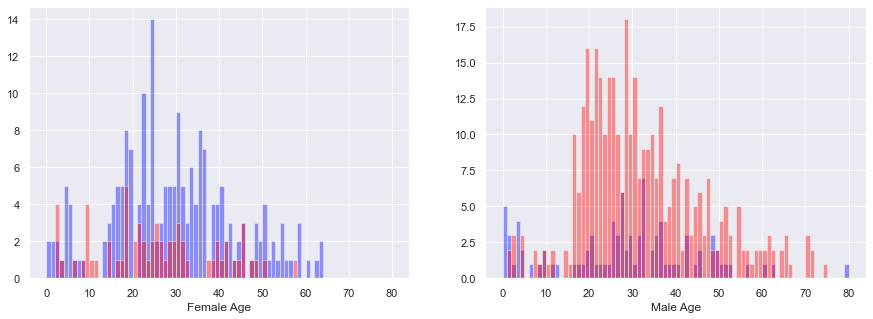

In [499]:
plt.figure(figsize = (15,5),)
plt.subplot(121)
sns.distplot(Female_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='blue', axlabel='Female Age')
sns.distplot(Female_not_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='red',axlabel='Female Age')

plt.subplot(122)
sns.distplot(Male_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='blue', axlabel='Male Age')
sns.distplot(Male_not_survived['Age'].dropna().values,kde=False,
             bins=range(0,81,1),color='red',axlabel='Male Age')

In [500]:
# 양/음의 상관관계

In [501]:
train.info()
# passengerId, Name 빼고
train.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [502]:
# train에서 특정 컬럼 빼기
# 상관계수 행렬
train.drop("PassengerId",axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


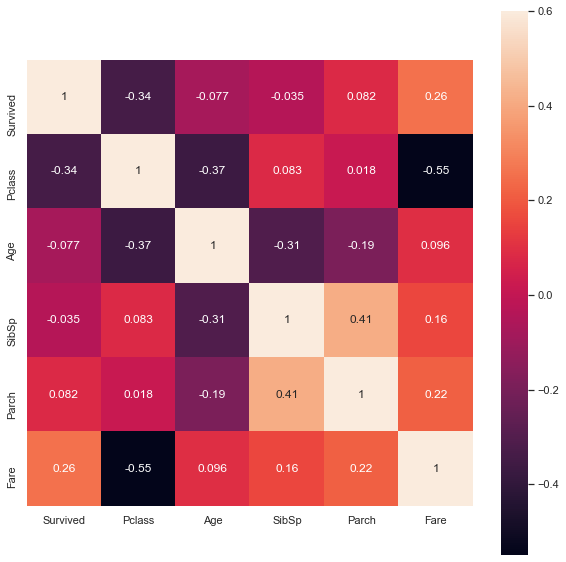

In [503]:
plt.figure(figsize = (10,10))
sns.heatmap(train.drop("PassengerId",axis=1).corr(),square = True,annot = True, vmax = 0.6)

In [504]:
# Feature Eng. => 어떤 피쳐가 중요하냐구!
# 변수추가, 카테고리 데이터 -> 수치변환, OneHotEncoder...
# train # 891 X 12
# test # 418 X 11
train_test_data = [train, test] # list 내에 데이터프레임 2개가 요소로 저장.

In [505]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(" ([A-Za-z]+)\.")

In [506]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [507]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [508]:
# Q3. 전체 호칭은 행 인덱스, 성별은 열 인덱스
#
#   Sex  Female  Male
# Title
# ----------------------------
# Capt    0       1
# ...
# Miss   182      0   

In [509]:
train.groupby(['Title','Sex']).size().unstack().fillna(0)

Sex,female,male
Title,,
Capt,0.0,1.0
Col,0.0,2.0
Countess,1.0,0.0
Don,0.0,1.0
Dr,1.0,6.0
Jonkheer,0.0,1.0
Lady,1.0,0.0
Major,0.0,2.0
Master,0.0,40.0


In [510]:
pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [511]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Jonkheer      1
Capt          1
Countess      1
Don           1
Sir           1
Mme           1
Name: Title, dtype: int64

In [512]:
for dataset in train_test_data:
    dataset['Title'] =  dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] =  dataset['Title'].replace('Ms','Miss')
    dataset['Title'] =  dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] =  dataset['Title'].replace('Lady','Mrs')
    
    dataset['Title'] =  dataset['Title'].replace([
        'Countess','Sir','Capt','Jonkheer','Don','Dr','Rev','Col','Major'],'Other')

In [513]:
pd.crosstab(train['Title'], train['Sex'])


Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,127,0
Other,2,20


In [514]:
train.groupby('Title').Survived.mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.795276
Other     0.318182
Name: Survived, dtype: float64

In [515]:
train[['Title','Survived']].groupby("Title",as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.795276
4,Other,0.318182


In [516]:
Title_mapping={'Mr':1,'Miss':2,"Mrs":3,'Master':4,'Other':5}

In [517]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(Title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [518]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [519]:
train['Title'].value_counts()

1    517
2    185
3    127
4     40
5     22
Name: Title, dtype: int64

In [520]:
# female -> 1 , male -> 0
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0})

In [521]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [522]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [523]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [524]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [525]:
# NaN은 모두 'S'로 설정
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [526]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [527]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [528]:
# S:0, C:1, Q:2
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1,'Q':2})

In [529]:
train.Embarked.unique()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [530]:
# Age열에 대해 결측값을 다른 값으로 대체하겠다.
# Age 평균 - Age 표준편차 <= 난수발생(Age 결측값 대체) <= Age 평균 + Age 표준편차
# train['Age'].mean() # 29-14 ~ 29+14 사이 난수
# train['Age'].std()

for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum() # null의 갯수만큼 난수 생성하면 됨(정수)
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list




# 더 좋은 방법을 고민해보자...



C:\Users\joww0\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [531]:
train['Age'].isnull().sum()
test['Age'].isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [532]:
# Age의 구간을 5개로 나눔
train['Age']
train['AgeBand'] = pd.cut(train['Age'],5)

In [533]:
train[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.521739
1,"(16.336, 32.252]",0.359202
2,"(32.252, 48.168]",0.363265
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [534]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16)&(dataset['Age'] <= 32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32)&(dataset['Age'] <= 48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48)&(dataset['Age'] <= 64),'Age'] = 3
    dataset.loc[(dataset['Age'] > 64),'Age'] = 4

In [535]:
train.Age

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    2.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

In [536]:
# train과 test의 'Fare'값이 NaN인 셀 값을 train의 'Fare' 컬럼의 중앙값으로 변경.
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    

In [537]:
# pd.cut: 동일 길이로 나누어서 범주로 만듦
# pd.qcut: 동일 데이터 갯수로 나누어서 범주로 만듦
train['FareBand'] = pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby('FareBand',as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [538]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91)&(dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454)&(dataset['Fare'] <= 31.0),'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0)&(dataset['Fare'] <= 512.329),'Fare'] = 3
  

In [539]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Title        891 non-null    int64   
 13  AgeBand      891 non-null    category
 14  FareBand     891 non-null    category
dtypes: category(2), float64(2), int64(8), object(3)
memory usage: 92.8+ KB


In [540]:
# 혼자 여행한 경우 사망률이 높음.
# 패밀리 사이즈 1 이상은 의미가 없음
# -> 패밀리 사이즈가 1이면 1 아니면 모두 0
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1

train[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [541]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0 # 혼자가 아님(Default).
    dataset.loc[dataset['FamilySize'] == 1 ,'IsAlone'] = 1
    
train[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [542]:
features_drop = ['Name','SibSp','Parch', 'Ticket', 'Cabin','FamilySize' ]
train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(features_drop, axis = 1)
train = train.drop(['PassengerId','AgeBand','FareBand'], axis = 1)

In [543]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0.0,0,1,0
1,1,1,1,2.0,3.0,1,3,0
2,1,3,1,1.0,1.0,0,2,1
3,1,1,1,2.0,3.0,0,3,0
4,0,3,0,2.0,1.0,0,1,1


In [544]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0.0,2,1.0,1
1,893,3,1,2.0,0.0,0,3.0,0
2,894,2,0,3.0,1.0,2,1.0,1
3,895,3,0,1.0,1.0,0,1.0,1
4,896,3,1,1.0,1.0,0,3.0,0


In [570]:
xTrain = train.drop("Survived",axis=1)
yTrain = train['Survived']
xTest = test.drop('PassengerId',axis = 1).copy()
xTrain.shape, yTrain.shape, xTest.shape

((891, 7), (891,), (418, 7))

In [571]:
from sklearn.tree import DecisionTreeClassifier

In [572]:
model = DecisionTreeClassifier()
model.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [573]:
round(model.score(xTrain, yTrain)*100,2)

86.98

In [574]:
y_pred_dt = model.predict(xTest)

In [575]:
# accuracy
mysubmit = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived': y_pred_dt
})
mysubmit.to_csv("mysubmit.csv", index = False)

In [ ]:
# 내일 Random Forest 해보자.